In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

In [3]:
n_samples = 100
datasets = [
    datasets.make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    datasets.make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    datasets.make_blobs(n_samples=n_samples, centers=2, random_state=5),
    datasets.make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, random_state=5)
]
kernels = ['linear']

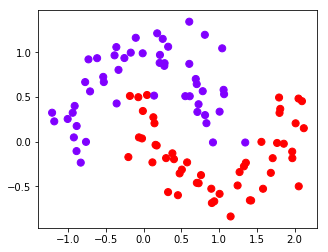

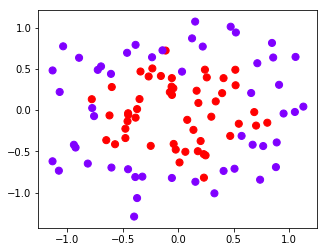

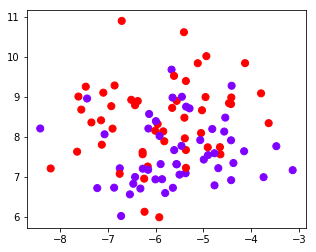

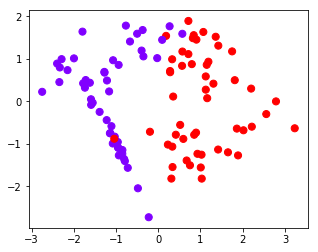

In [4]:
# 几种数据的简单分布
for X, y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

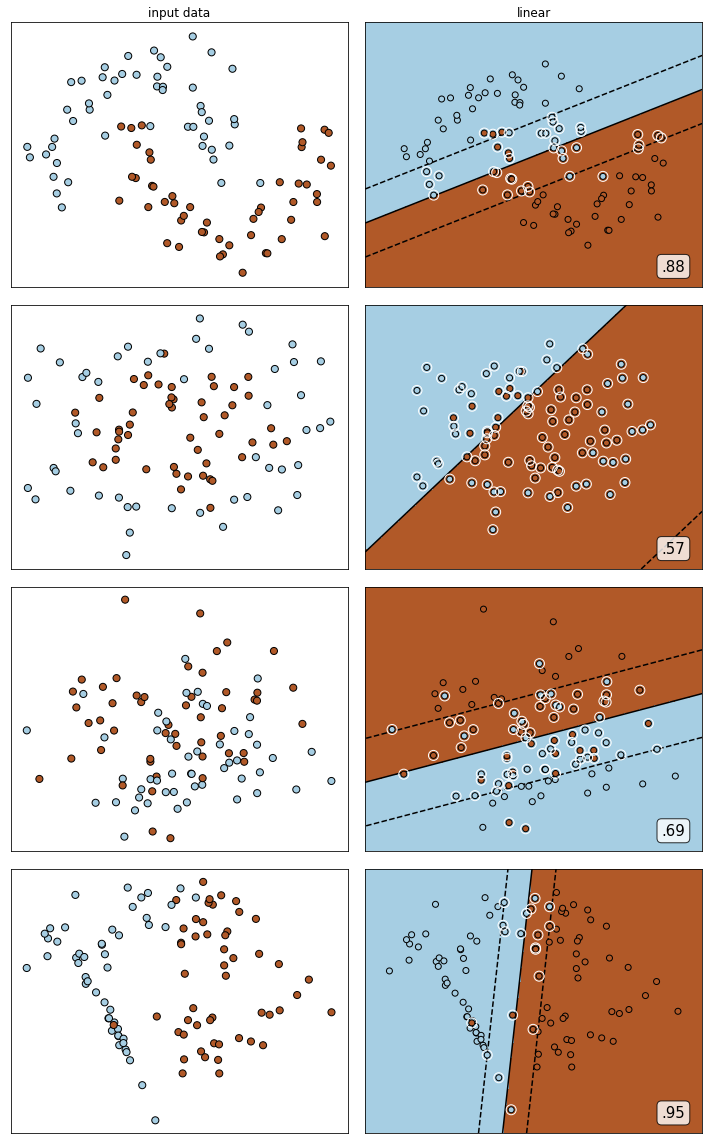

In [11]:
nrows = len(datasets)
ncols = len(kernels) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 16))
for i_index, (X, y) in enumerate(datasets):
    # 获取每一行第一列的数据
    ax = axes[i_index, 0]
    if i_index == 0:
        ax.set_title('input data')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    for j_index, kernel in enumerate(kernels):
        ax = axes[i_index, j_index+1]
        # 先绘制原始的散点图
        ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
        # 建立模型 训练数据
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
        score= clf.score(X, y)
        # 标注支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, zorder=10, facecolors='none', edgecolors='white')
        # 接下来绘制 决策边界
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        # 绘制网格点
        xx, yy = np.mgrid[x_min: x_max: 200j, y_min: y_max: 200j]
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
        ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
        ax.set_xticks(())
        ax.set_yticks(())
        if i_index == 0:
            ax.set_title(kernel)
        ax.text(0.95, 0.06, 
                ('%.2f' % score).lstrip('0'),
                size=15,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),
                transform= ax.transAxes,
                horizontalalignment='right'
               )
plt.tight_layout()
plt.show()
        
    
    